import libraries

In [1]:
library(caret)
library(dplyr)
library(keras)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



reading data

In [2]:
data <- read.csv("whetherdata.csv")

In [3]:
print(data)

      ï..baresh       nam   dama tabkhir
1           0.0  45.33333  16.50       6
2           0.0  40.33333  18.00       5
3           0.0  31.33333  21.00       5
4           0.0  27.00000  22.50       7
5           0.0  28.33333  21.50       9
6           0.0  31.00000  23.00       6
7           0.0  64.33333   4.00       0
8           0.0  59.66667   7.00       0
9           0.0  41.00000   9.50       0
10          0.0  48.66667   3.50       0
11          5.0  73.00000  -1.50       0
12          0.0  68.33333   0.00       0
13          0.0  62.00000   0.00       0
14          0.0  47.66667   3.50       0
15          0.0  49.66667   6.50       0
16          0.0  59.66667   6.00       2
17          0.0  59.66667   9.00       1
18          0.0  84.66667   3.25       1
19          0.0  65.66667   8.00       2
20          0.0  59.33333   8.50       3
21          0.0  68.00000   8.00       2
22          0.0  61.33333   9.50       2
23          0.0  41.66667  12.50       4
24          2.5 

تغییر نام ستون هدف

In [4]:
names(data)[which(names(data) == "tabkhir")] <- "Evaporation"

مشخص کردن ستون های مورد استفاده در ساختن مدل

In [5]:
target <- "Evaporation"
predictors <- setdiff(names(data), target)

تقسیم داده ها به داده های تست و تمرین

In [6]:
set.seed(123)
train_index <- createDataPartition(data$Evaporation, p = 0.7, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

In [7]:
colnames(test_data)

[1] "ï..baresh"   "nam"         "dama"        "Evaporation"

استفاده از مدل رگرسیون خطی و پیاده سازی آن روی دیتا

In [8]:
model <- train(
  as.formula(paste(target, "~", paste(predictors, collapse = "+"))),
  data = train_data,
  method = "lm"
)

بررسی کلی مدل رگرسیون خطی 

In [9]:
print(summary(model))


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4694  -1.1324  -0.1289   0.9815  19.1770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.337286   0.113323   11.80   <2e-16 ***
ï..baresh    0.148238   0.006844   21.66   <2e-16 ***
nam         -0.023133   0.001407  -16.45   <2e-16 ***
dama         0.300148   0.002991  100.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.793 on 8903 degrees of freedom
Multiple R-squared:  0.7431,	Adjusted R-squared:  0.7431 
F-statistic:  8586 on 3 and 8903 DF,  p-value: < 2.2e-16



پیاده سازی مدل رگرسیون خطی روی داده های تست و بررسی عملکرد آن

In [10]:
predictions <- predict(model, test_data)

In [11]:
results <- data.frame(Actual = test_data[[target]], Predicted = predictions)

In [12]:
print(results)

      Actual     Predicted
1          6  5.241024e+00
9          0  3.240230e+00
12         0 -2.434889e-01
20         3  2.515972e+00
21         2  2.165409e+00
24         0  1.892419e+00
28         3  2.431150e+00
29         2  3.562927e+00
32         3  3.204654e+00
33         4  4.866423e+00
39         7  7.107167e+00
42         3  4.551758e+00
46         4  6.361528e+00
48         3  5.241024e+00
54         4  4.336432e+00
55         4  3.158387e+00
59         3  4.851906e+00
66         6  6.014529e+00
67         4  4.772402e+00
68         3  3.997728e+00
69         3  3.978742e+00
71         3  4.644291e+00
74         4  5.252299e+00
76         1  1.945935e+00
77         1  8.912680e-01
80         3  2.553943e+00
81         3  2.061017e+00
84         4  3.666735e+00
85         3  2.353454e+00
96        10  8.419863e+00
107        5  4.936144e+00
110        3  5.773689e+00
111        5  6.252988e+00
115        6  6.095203e+00
116        7  6.483737e+00
121        7  7.596529e+00
1

محاسبه شاخص rmse

In [13]:
rmse <- sqrt(mean((test_data$Evaporation - predictions)^2))

In [14]:
print(paste("RMSE:", rmse))

[1] "RMSE: 1.68801942649564"


خواندن پکیج ضروری برای مدل شبکه عصبی 

In [8]:
library(nnet)

use grid search for paramether tuning and also cross validation to prevent overfitting

In [16]:
control <- trainControl(method = "repeatedcv", number = 8, repeats = 3)  
grid <- expand.grid(size = c(2 , 4, 16,32), decay = c(0.1, 0.01, 0.001))   

در سلول بالا گرید سرچ مقادیر مختلف را دریافت و حالت های مختلف را روی مدل تست میکند و بهترین نتیجه را در مدل اصلی ذخیره میکند

پیاده سازی مدل شبکه عصبی روی داده ها

In [17]:
set.seed(123)
model_nn <- train(
  Evaporation ~ .,  
  data = train_data,
  method = "nnet",
  trControl = control,
  tuneGrid = grid,
  linout = TRUE,  
  trace = TRUE   
)

# weights:  11
initial  value 280448.458026 
iter  10 value 96032.136105
iter  20 value 23079.161494
iter  30 value 22059.556301
iter  40 value 21562.294655
iter  50 value 21431.688597
iter  60 value 21360.455728
iter  70 value 21225.305033
iter  80 value 20808.894277
iter  90 value 20568.180735
iter 100 value 20544.444003
final  value 20544.444003 
stopped after 100 iterations
# weights:  21
initial  value 234269.383000 
iter  10 value 104716.518981
iter  20 value 97548.284175
iter  30 value 42577.927005
iter  40 value 37175.196548
iter  50 value 33051.070120
iter  60 value 27478.714207
iter  70 value 22426.645231
iter  80 value 20561.237531
iter  90 value 20480.285382
iter 100 value 20433.711754
final  value 20433.711754 
stopped after 100 iterations
# weights:  81
initial  value 356181.059471 
iter  10 value 88381.592317
iter  20 value 39814.685930
iter  30 value 29955.918328
iter  40 value 27341.726735
iter  50 value 25870.647241
iter  60 value 23701.348815
iter  70 value 22720.221

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

# weights:  161
initial  value 187534.729011 
iter  10 value 34776.649205
iter  20 value 31439.376607
iter  30 value 28678.720309
iter  40 value 25531.595044
iter  50 value 23900.460408
iter  60 value 23711.090187
iter  70 value 23484.287572
iter  80 value 23394.878930
iter  90 value 23374.013431
iter 100 value 23290.203099
final  value 23290.203099 
stopped after 100 iterations


نگاه کلی به مدل شبکه عصبی و بررسی حالت های مختلف پارامتر ها در مدل شبکه عصبی

Neural Network 

8907 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 3 times) 
Summary of sample sizes: 7793, 7794, 7793, 7794, 7794, 7794, ... 
Resampling results across tuning parameters:

  size  decay  RMSE      Rsquared   MAE     
   2    0.001  2.383843  0.5791331  1.876005
   2    0.010  2.298906  0.6879702  1.777726
   2    0.100  1.797249  0.7517177  1.309884
   4    0.001  1.908223  0.6788942  1.409243
   4    0.010  1.647976  0.7832180  1.160663
   4    0.100  1.636401  0.7862691  1.156051
  16    0.001  1.647455  0.7831478  1.156779
  16    0.010  1.628769  0.7883173  1.151788
  16    0.100  1.627262  0.7885862  1.149863
  32    0.001  1.625276  0.7891801  1.148926
  32    0.010  1.624606  0.7892192  1.149131
  32    0.100  1.629299  0.7880820  1.150115

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 32 and decay = 0.01.


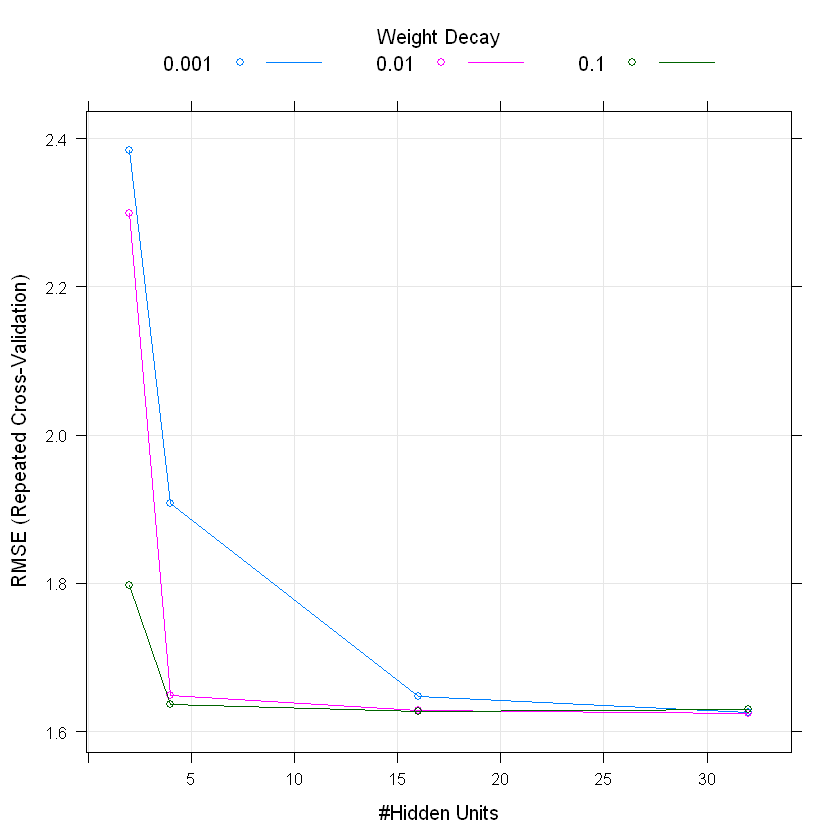

In [18]:
print(model_nn)
plot(model_nn)

همانطور که به نظر میرسید با افزایش تعداد نورون های شبکه عصبی و افزایش پارامتر لرنینگ ریت، میانگین خطای مطلق در مدل کاهش می یابد

In [19]:
predictions_nn <- predict(model_nn, test_data)

In [20]:
rmse_nn <- sqrt(mean((test_data$Evaporation - predictions_nn)^2))
print(paste("RMSE :", rmse_nn))

[1] "RMSE : 1.52726220847589"


استفاده مجدد از شبکه های عصبی و افزایش تعداد نورون ها 

In [9]:
control <- trainControl(method = "repeatedcv", number = 8, repeats = 3)  
grid <- expand.grid(size = c(16,32,64,128), decay = c(0.1, 0.01,0.05))   

In [10]:
set.seed(123)
model_nn <- train(
  Evaporation ~ .,  
  data = train_data,
  method = "nnet",
  trControl = control,
  tuneGrid = grid,
  linout = TRUE,  
  trace = TRUE   
)

# weights:  81
initial  value 224567.933574 
iter  10 value 31597.911144
iter  20 value 27902.302430
iter  30 value 25244.163664
iter  40 value 21486.924914
iter  50 value 20562.633980
iter  60 value 20350.179744
iter  70 value 20232.913449
iter  80 value 20171.803811
iter  90 value 20120.211048
iter 100 value 20032.298010
final  value 20032.298010 
stopped after 100 iterations
# weights:  161
initial  value 280933.297778 
iter  10 value 38098.560912
iter  20 value 34229.440449
iter  30 value 30285.025122
iter  40 value 26544.935642
iter  50 value 24481.928953
iter  60 value 22614.567510
iter  70 value 21565.604665
iter  80 value 21298.599018
iter  90 value 20964.630096
iter 100 value 20521.121327
final  value 20521.121327 
stopped after 100 iterations
# weights:  321
initial  value 172017.984848 
iter  10 value 28033.323675
iter  20 value 26051.045813
iter  30 value 24920.512577
iter  40 value 22228.229374
iter  50 value 21561.347185
iter  60 value 20886.080512
iter  70 value 20611.32

Neural Network 

8907 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 3 times) 
Summary of sample sizes: 7793, 7794, 7793, 7794, 7794, 7794, ... 
Resampling results across tuning parameters:

  size  decay  RMSE      Rsquared   MAE     
   16   0.01   1.627111  0.7887620  1.148945
   16   0.05   1.627337  0.7886198  1.149456
   16   0.10   1.626089  0.7891335  1.150247
   32   0.01   1.624110  0.7894994  1.148176
   32   0.05   1.625620  0.7889991  1.148018
   32   0.10   1.624924  0.7892841  1.147005
   64   0.01   1.631515  0.7875441  1.153411
   64   0.05   1.624298  0.7893725  1.146884
   64   0.10   1.629597  0.7879702  1.148586
  128   0.01   1.631822  0.7873573  1.150456
  128   0.05   1.632242  0.7872543  1.149819
  128   0.10   1.631111  0.7877423  1.149314

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 32 and decay = 0.01.


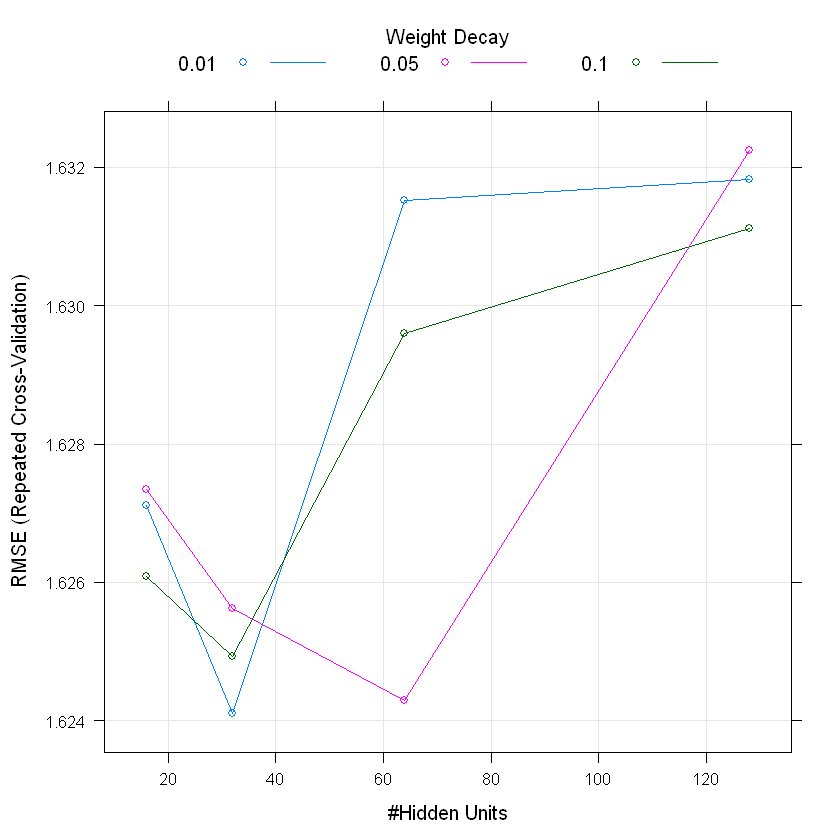

In [11]:
print(model_nn)
plot(model_nn)

In [12]:
predictions_nn <- predict(model_nn, test_data)
rmse_nn <- sqrt(mean((test_data$Evaporation - predictions_nn)^2))
print(paste("RMSE :", rmse_nn))

[1] "RMSE : 1.52726220847589"
